# Data for Sales
Through exploratory data analysis, it is observed that sales exhibit seasonality and are influenced by factors such as marketing campaigns, product attributes, pricing, and external factors like economic indicators. There may also be correlation among different variables. Also every columns in the dataset is explained briefly below:

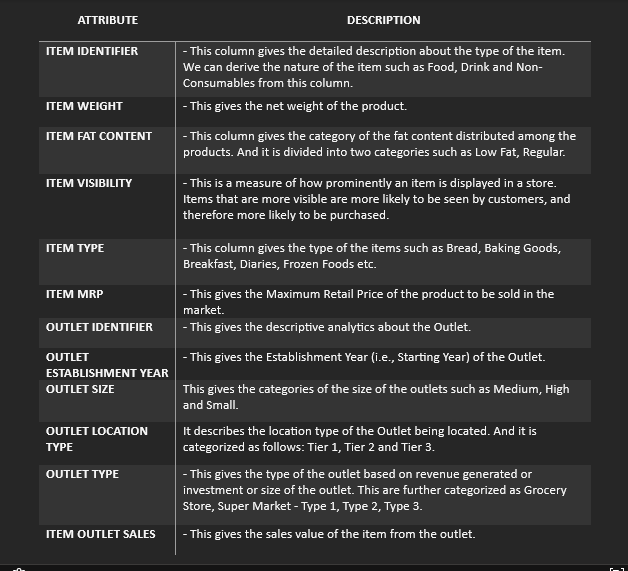

In [157]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Reading data from csv file to data frame with pandas

In [159]:
df = pd.read_csv('Train.csv')

In [160]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


# Data exploration

In [162]:
df.shape

(8523, 12)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [164]:
df.duplicated().sum()

0

In [165]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [166]:
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


# Data Cleaning

Finding the mean of Item_Weight for each Item_Identifier and replacing null values by it

In [169]:
df.groupby('Item_Identifier')['Item_Weight'].mean()

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

In [170]:
df.groupby('Item_Identifier')['Item_Weight'].transform('mean')

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [171]:
df['Item_Weight'] = df['Item_Weight'].fillna(df.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

In [172]:
df.head(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


In [173]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [174]:
df[df['Item_Weight'].isnull()]['Item_Identifier']

927     FDN52
1922    FDK57
4187    FDE52
5022    FDQ60
Name: Item_Identifier, dtype: object

In [175]:
df[df['Item_Identifier'].isin(df[df['Item_Weight'].isnull()]['Item_Identifier'].tolist())]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [176]:
df.groupby('Item_Type')['Item_Weight'].transform('mean')

0       13.379905
1       11.879775
2       12.771212
3       13.236713
4       13.524780
          ...    
8518    13.031230
8519    12.285317
8520    13.052327
8521    13.031230
8522    11.879775
Name: Item_Weight, Length: 8523, dtype: float64

In [177]:
df['Item_Weight'] = df['Item_Weight'].fillna(df.groupby('Item_Type')['Item_Weight'].transform('mean'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [178]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


 Finding the Outlet_Size for each Outlet_Identifier 

In [180]:
df.groupby('Outlet_Identifier')['Outlet_Size'].unique()

Outlet_Identifier
OUT010       [nan]
OUT013      [High]
OUT017       [nan]
OUT018    [Medium]
OUT019     [Small]
OUT027    [Medium]
OUT035     [Small]
OUT045       [nan]
OUT046     [Small]
OUT049    [Medium]
Name: Outlet_Size, dtype: object

In [181]:
df.groupby(['Outlet_Identifier','Outlet_Type'])['Outlet_Size'].unique()

Outlet_Identifier  Outlet_Type      
OUT010             Grocery Store           [nan]
OUT013             Supermarket Type1      [High]
OUT017             Supermarket Type1       [nan]
OUT018             Supermarket Type2    [Medium]
OUT019             Grocery Store         [Small]
OUT027             Supermarket Type3    [Medium]
OUT035             Supermarket Type1     [Small]
OUT045             Supermarket Type1       [nan]
OUT046             Supermarket Type1     [Small]
OUT049             Supermarket Type1    [Medium]
Name: Outlet_Size, dtype: object

In [182]:
df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.mode()[0])

0        Small
1       Medium
2        Small
3        Small
4        Small
         ...  
8518     Small
8519     Small
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [183]:
df.groupby(['Outlet_Type'])['Outlet_Size'].transform(lambda x: x.mode()[0]).isna().sum()

0

In [184]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.mode()[0]))

In [185]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [186]:
df.groupby(['Outlet_Identifier','Outlet_Type'])['Outlet_Size'].unique()

Outlet_Identifier  Outlet_Type      
OUT010             Grocery Store         [Small]
OUT013             Supermarket Type1      [High]
OUT017             Supermarket Type1     [Small]
OUT018             Supermarket Type2    [Medium]
OUT019             Grocery Store         [Small]
OUT027             Supermarket Type3    [Medium]
OUT035             Supermarket Type1     [Small]
OUT045             Supermarket Type1     [Small]
OUT046             Supermarket Type1     [Small]
OUT049             Supermarket Type1    [Medium]
Name: Outlet_Size, dtype: object

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [188]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Analysis

 ### Checking dublicated data in Item_Fat_Content using Group by for Item_Type and Item_Fat_Content with the aggregate function of size of the Outlet_Type column values

In [191]:
df.groupby(['Item_Type','Item_Fat_Content']).agg({'Outlet_Type':[np.size]})

Outlet_Type
                                      size
Item_Type     Item_Fat_Content            
Baking Goods  LF                        20
              Low Fat                  301
              Regular                  306
              low fat                    8
              reg                       13
...                                    ...
Starchy Foods LF                         9
              Low Fat                   72
              Regular                   59
              low fat                    1
              reg                        7

[70 rows x 1 columns]

In [192]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

 ### Standardize 'Item_Fat_Content' column by making values consistent

In [194]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF' : 'Low Fat', 'low fat' : 'Low Fat', 'reg' : 'Regular'})
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [195]:
df.groupby(['Item_Type','Item_Fat_Content']).agg({'Outlet_Type':[np.size]})

Outlet_Type
                                              size
Item_Type             Item_Fat_Content            
Baking Goods          Low Fat                  329
                      Regular                  319
Breads                Low Fat                  140
                      Regular                  111
Breakfast             Low Fat                   41
                      Regular                   69
Canned                Low Fat                  341
                      Regular                  308
Dairy                 Low Fat                  418
                      Regular                  264
Frozen Foods          Low Fat                  450
                      Regular                  406
Fruits and Vegetables Low Fat                  630
                      Regular                  602
Hard Drinks           Low Fat                  214
Health and Hygiene    Low Fat                  520
Household             Low Fat                  910
Meat                  Low Fat                  170
                      Regular                  255
Others                Low Fat                  169
Seafood               Low Fat                   37
                      Regular                   27
Snack Foods           Low Fat                  692
                      Regular                  508
Soft Drinks           Low Fat                  374
                      Regular                   71
Starchy Foods         Low Fat                   82
                      Regular                   66

 ### Getting the count of Item_Visibility column with value 0

In [197]:
sum(df['Item_Visibility'] == 0)

526

 Replace zero variables in Item_Visibility with the mean value

In [199]:
df['Item_Visibility'] = df['Item_Visibility'].replace(0, df['Item_Visibility'].mean()) 
sum(df['Item_Visibility'] == 0)

0

 ### Getting all the unique value from Outlet_Establishment_Year column from the dataset

In [201]:
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

# Data Visualization

 ### Which outlet_type achive more sales

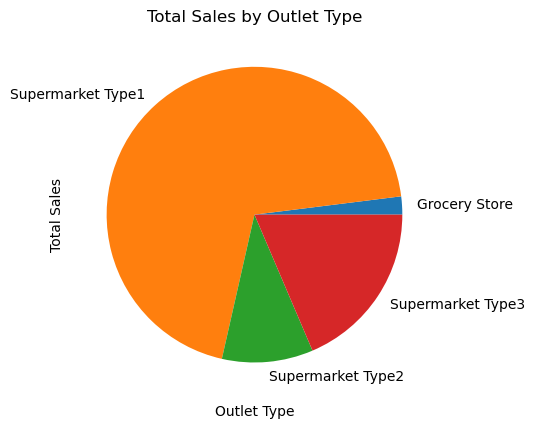

In [204]:
sales_vs_outlet_type = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()
sales_vs_outlet_type.plot(kind='pie')
plt.title('Total Sales by Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Total Sales')
plt.show()

 ### ---> Observed supermarket 1 achive the most sales
 ### So, supermarket 1 has 3 outlet sizes which one achive more sales ?

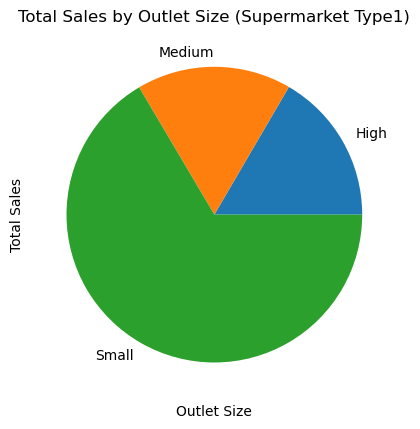

In [206]:
supermarket1_data = df[df['Outlet_Type'] == 'Supermarket Type1']

# Group by Outlet_Size and sum the sales
sales_by_size = supermarket1_data.groupby('Outlet_Size')['Item_Outlet_Sales'].sum()
sales_by_size.plot(kind='pie')
plt.title('Total Sales by Outlet Size (Supermarket Type1)')
plt.xlabel('Outlet Size')
plt.ylabel('Total Sales')
plt.show()

 ### ---> Observed supermarket_1 with small size achive the most sales
 ### So, supermarket_1 with small size exists in 2 locations where does it achive more sales ?

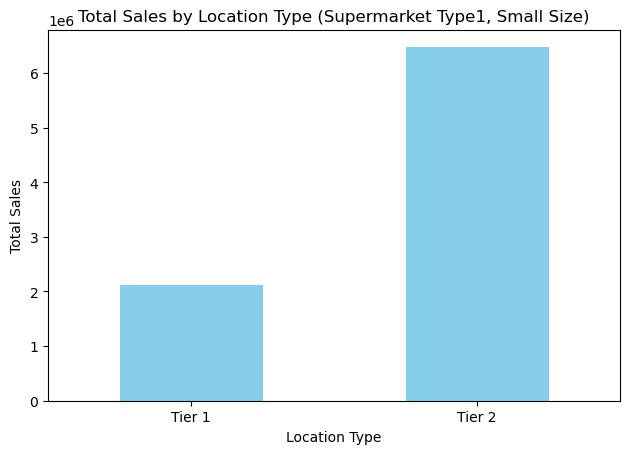

In [208]:
supermarket1_small_data = df[(df['Outlet_Type'] == 'Supermarket Type1') & (df['Outlet_Size'] == 'Small')]

sales_by_location_small = supermarket1_small_data.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum()

# Plot the data
sales_by_location_small.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Location Type (Supermarket Type1, Small Size)')
plt.xlabel('Location Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

 ### ---> supermarket_1 - small size - in tire_1 achive the most sales

 ### Plotting the Bar Graph with count of Outlet_Establishment_Year and identify all unique values from the Outlet_Establishment_Year

Unique values in Outlet_Establishment_Year: [1999 2009 1998 1987 1985 2002 2007 1997 2004]


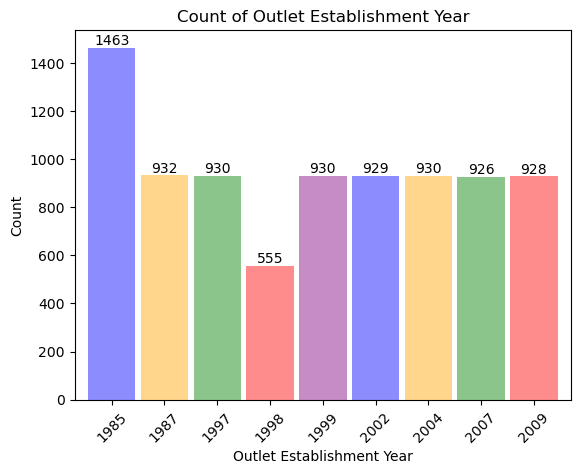

In [211]:
unique_years = df['Outlet_Establishment_Year'].unique()
print(f'Unique values in Outlet_Establishment_Year: {unique_years}')
year_counts = df['Outlet_Establishment_Year'].value_counts().sort_index()

# Define colors for the bars
colors = ['blue', 'orange', 'green', 'red', 'purple'] 
# Plotting the bar graph
ax=year_counts.plot(kind='bar', width=0.9, color=colors,alpha=0.45)
plt.title('Count of Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
# Adding the count on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.show()

 ### Question: Is there a relation between the outlet estabilshment year and total sales ?

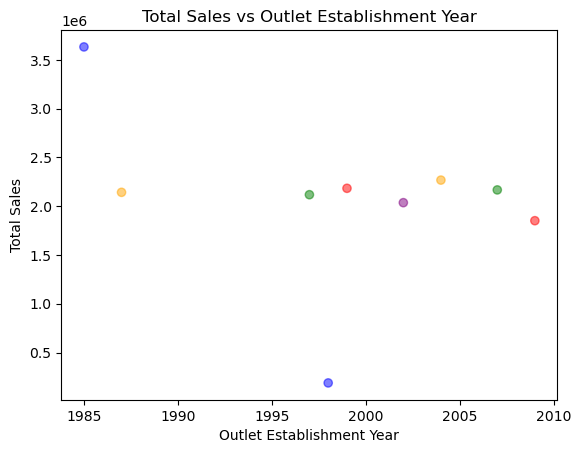

In [213]:
sales_vs_year=df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum()
colors = ['blue', 'orange', 'green', 'blue','red', 'purple', 'orange', 'green', 'red'] 
plt.scatter(sales_vs_year.index, sales_vs_year.values, color= colors ,alpha = 0.5)
plt.title('Total Sales vs Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.show()

 ### ---> Observed outlet establishment year doesnot affect on total sales except 2 outlayers 

 ### Plotting the Bar Graph with count of Item_Type and identify all unique values from the Item_Type

Unique values in Item_Type: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


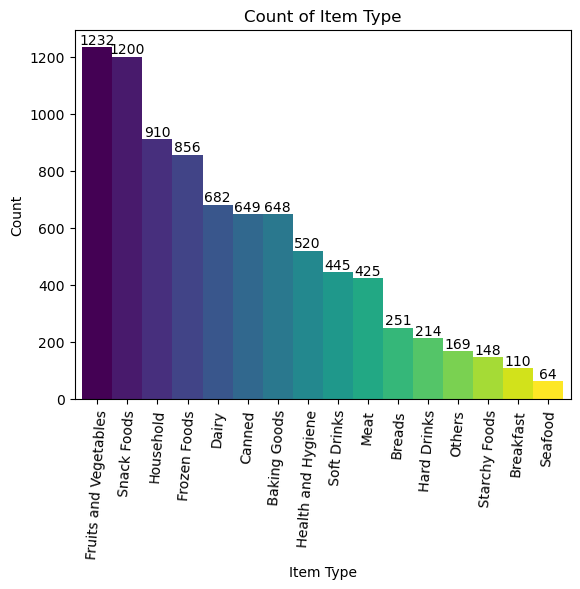

In [216]:
# Identify unique values
unique_item_types = df['Item_Type'].unique()
print(f'Unique values in Item_Type: {unique_item_types}')

# Count occurrences of each item type
item_type_counts = df['Item_Type'].value_counts()

# Define colors for the bars
colors = plt.cm.viridis(np.linspace(0, 1, len(item_type_counts)))

# Plotting the bar graph with wider bars
ax = item_type_counts.plot(kind='bar', width=1, color=colors)
plt.title('Count of Item Type')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.xticks(rotation=86)

# Adding the count on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.show()

 ### Question : which item make higher sales ?

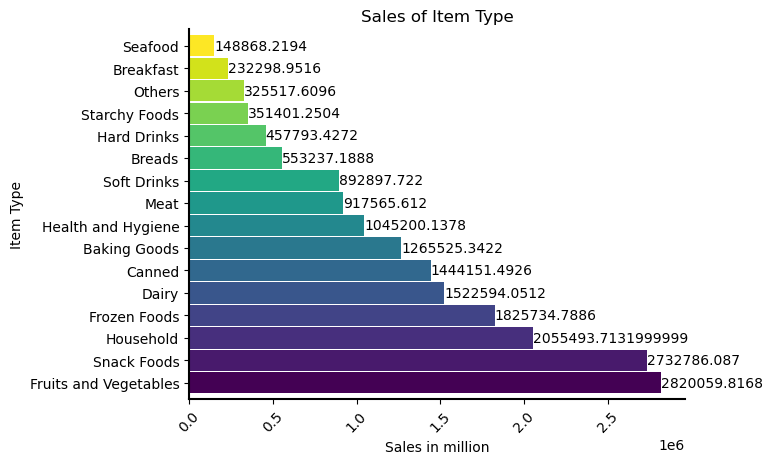

In [218]:
sales_vs_item_type = df.groupby('Item_Type')['Item_Outlet_Sales'].sum()
sales_vs_item_type = sales_vs_item_type.sort_values(ascending=False)
ax=sales_vs_item_type.plot(kind='barh', width=0.95, color=colors)
plt.title('Sales of Item Type')
plt.xlabel('Sales in million')
plt.ylabel('Item Type')
plt.xticks(rotation=46)

# Adding the count on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center')
# Customizing the borders
ax.spines['top'].set_visible(False)  # Remove the top border
ax.spines['right'].set_visible(False)  # Remove the right border
ax.spines['left'].set_color('black')  # Set the left border color
ax.spines['left'].set_linewidth(1.5)  # Set the left border width
ax.spines['bottom'].set_color('black')  # Set the bottom border color
ax.spines['bottom'].set_linewidth(1.5)  # Set the bottom border width

plt.show()

 ### --->  The most achiving sales item is fruits and vegetables and The least is seafood

 ### Question:  sales depend on item price or not?

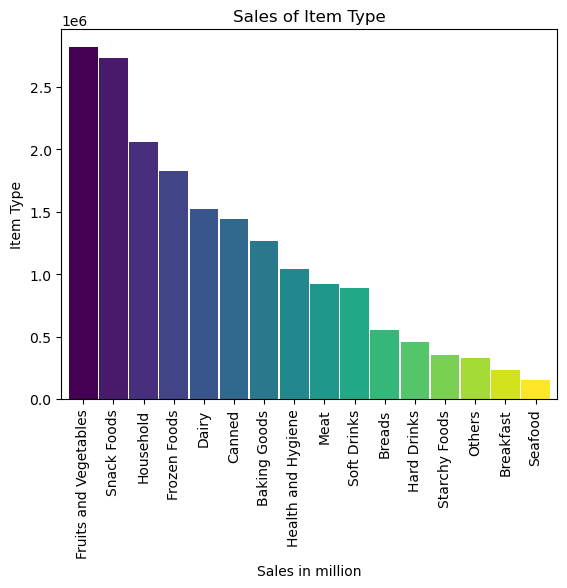

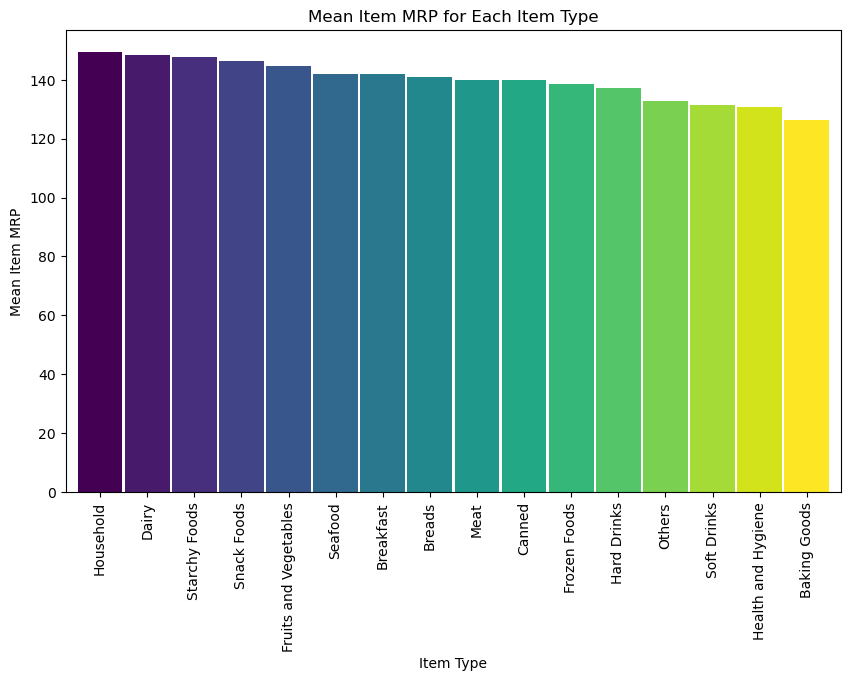

In [221]:
sales_vs_item_type = df.groupby('Item_Type')['Item_Outlet_Sales'].sum()
sales_vs_item_type = sales_vs_item_type.sort_values(ascending=False)
ax=sales_vs_item_type.plot(kind='bar', width=0.95, color=colors)
plt.title('Sales of Item Type')
plt.xlabel('Sales in million')
plt.ylabel('Item Type')
plt.show()

item_type_mrp_mean = df.groupby('Item_Type')['Item_MRP'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
item_type_mrp_mean.plot(kind='bar',width=0.95 ,color= colors)
plt.title('Mean Item MRP for Each Item Type')
plt.xlabel('Item Type')
plt.ylabel('Mean Item MRP')
plt.show()

 ### ---> Total sales don't depend on item price

 ### Question: people care about item fat content or not ?

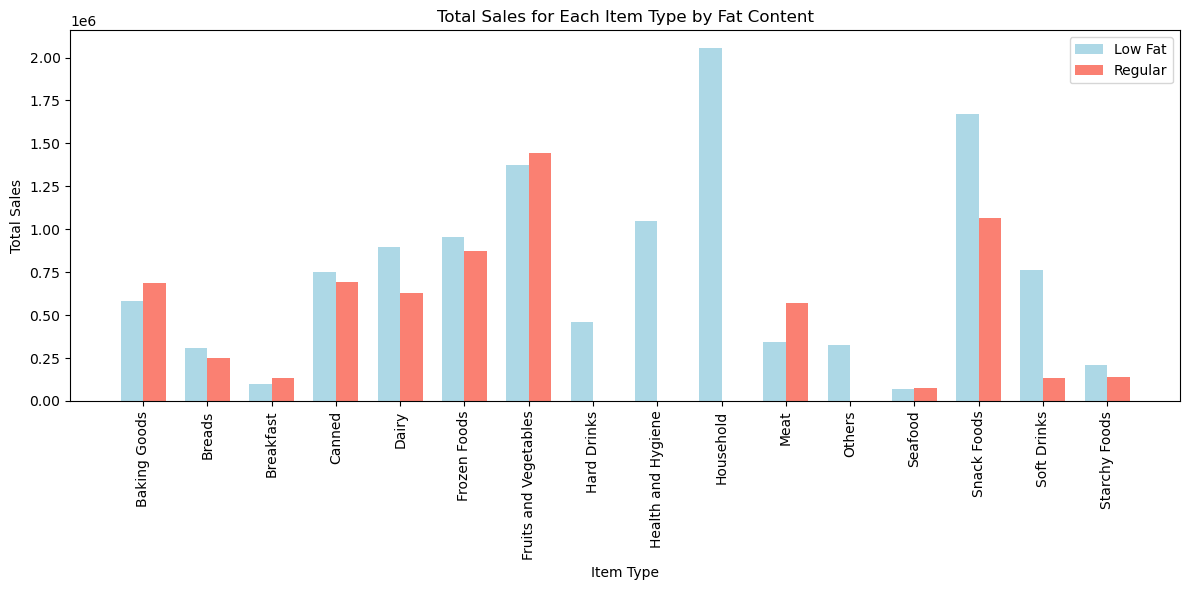

In [224]:
# Group by Item_Type and Item_Fat_Content, then sum the sales
item_sales_fat = df.groupby(['Item_Type', 'Item_Fat_Content'])['Item_Outlet_Sales'].sum().unstack()

# Define the position for each bar on the x-axis
bar_width = 0.35
index = np.arange(len(item_sales_fat.index))  # Positions for each Item_Type

# Plot the bars
plt.figure(figsize=(12,6))
plt.bar(index, item_sales_fat['Low Fat'], bar_width, label='Low Fat', color='lightblue')
plt.bar(index + bar_width, item_sales_fat['Regular'], bar_width, label='Regular', color='salmon')

# Add labels and title
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales for Each Item Type by Fat Content')
plt.xticks(index + bar_width / 2, item_sales_fat.index, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

 ### ---> People prefare low fat in some items like snack foods and soft drinks 
 ### ---> and regular fat content in some items like meat and baking goods

 ### Questin: Item_Visibility affect the sales or not ?

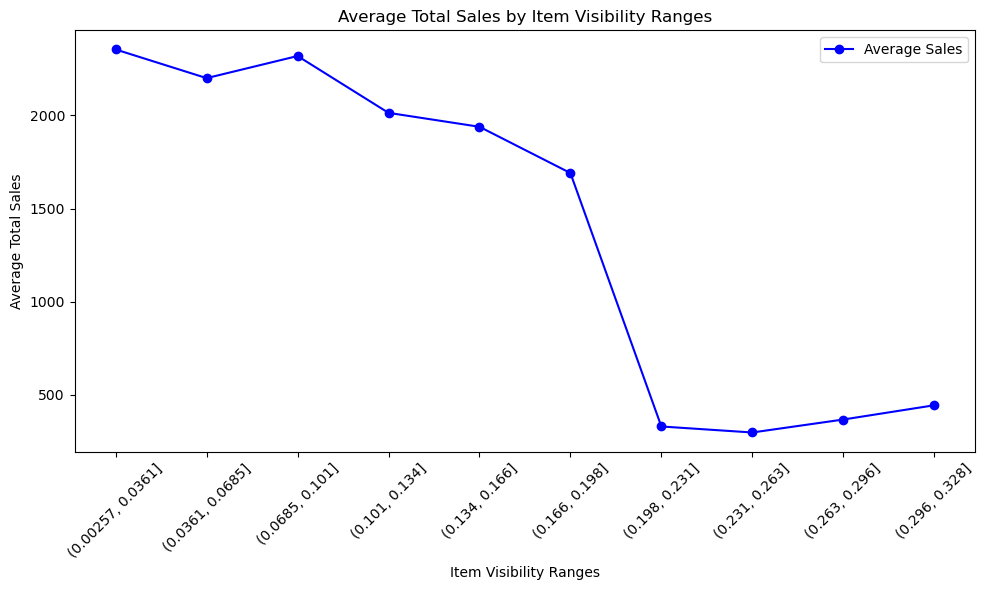

In [227]:
max_visibility=df['Item_Visibility'].max()
min_visibility=df['Item_Visibility'].min()

num_bins = 10
bins = np.linspace(min_visibility, max_visibility, num_bins + 1) 

df['Visibility_Bin'] = pd.cut(df['Item_Visibility'], bins=bins, include_lowest=True)

average_sales = df.groupby('Visibility_Bin',observed=True)['Item_Outlet_Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(average_sales['Visibility_Bin'].astype(str), average_sales['Item_Outlet_Sales'], marker='o', color='b', label='Average Sales')
plt.xlabel('Item Visibility Ranges')
plt.ylabel('Average Total Sales')
plt.title('Average Total Sales by Item Visibility Ranges')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.tight_layout()
plt.show()

 ### ---> Awesome!, items with lower visibility achive more sales. So, it doesn't affect.

 ### Visualizing the data distribution of the Item_weight column against the density distribution using Seaborn histplot

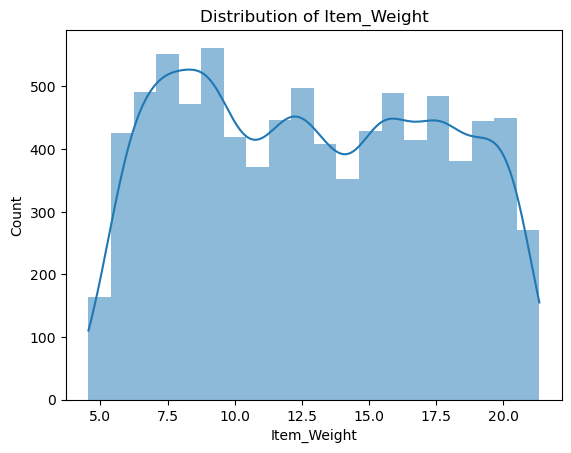

In [231]:
sns.histplot(df['Item_Weight'],bins = 20, kde = True, edgecolor ='none')
plt.title('Distribution of Item_Weight')
plt.show()

 ### Getting the Correlation Values from all the numeric columns from the dataset using Seaborn Heatmap

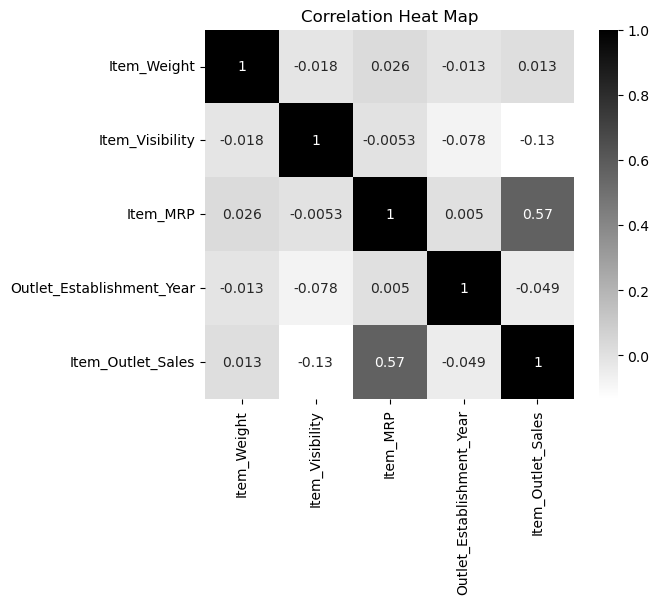

In [234]:
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(),cmap = 'binary', cbar = True, annot = True, square = True)
plt.title('Correlation Heat Map')
plt.show()

# Data Preprocessing

 ### Getting the data types of all the columns to find out the "object" data types columns for preprocessing before assigning it to dependent variable and independent variable

In [238]:
df.dtypes

Item_Identifier                object
Item_Weight                   float64
Item_Fat_Content               object
Item_Visibility               float64
Item_Type                      object
Item_MRP                      float64
Outlet_Identifier              object
Outlet_Establishment_Year       int64
Outlet_Size                    object
Outlet_Location_Type           object
Outlet_Type                    object
Item_Outlet_Sales             float64
Visibility_Bin               category
dtype: object

 ### Adding all the necessary column with "object" data types to the list and Label Encoding the columns

In [241]:
categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

 ### Convert categorical variables to numeric using OneHotEncoder

In [243]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [244]:
df.dtypes

Item_Identifier                object
Item_Weight                   float64
Item_Visibility               float64
Item_MRP                      float64
Outlet_Establishment_Year       int64
Item_Outlet_Sales             float64
Visibility_Bin               category
Item_Fat_Content_1               bool
Item_Type_1                      bool
Item_Type_2                      bool
Item_Type_3                      bool
Item_Type_4                      bool
Item_Type_5                      bool
Item_Type_6                      bool
Item_Type_7                      bool
Item_Type_8                      bool
Item_Type_9                      bool
Item_Type_10                     bool
Item_Type_11                     bool
Item_Type_12                     bool
Item_Type_13                     bool
Item_Type_14                     bool
Item_Type_15                     bool
Outlet_Identifier_1              bool
Outlet_Identifier_2              bool
Outlet_Identifier_3              bool
Outlet_Ident

In [245]:
df

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Visibility_Bin,Item_Fat_Content_1,Item_Type_1,Item_Type_2,...,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,FDA15,9.300,0.016047,249.8092,1999,3735.1380,"(0.00257, 0.0361]",False,False,False,...,False,False,True,True,False,False,False,True,False,False
1,DRC01,5.920,0.019278,48.2692,2009,443.4228,"(0.00257, 0.0361]",True,False,False,...,False,False,False,True,False,False,True,False,True,False
2,FDN15,17.500,0.016760,141.6180,1999,2097.2700,"(0.00257, 0.0361]",False,False,False,...,False,False,True,True,False,False,False,True,False,False
3,FDX07,19.200,0.066132,182.0950,1998,732.3800,"(0.0361, 0.0685]",True,False,False,...,False,False,False,False,True,False,True,False,False,False
4,NCD19,8.930,0.066132,53.8614,1987,994.7052,"(0.0361, 0.0685]",False,False,False,...,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,214.5218,1987,2778.3834,"(0.0361, 0.0685]",False,False,False,...,False,False,False,False,False,False,True,True,False,False
8519,FDS36,8.380,0.046982,108.1570,2002,549.2850,"(0.0361, 0.0685]",True,False,False,...,True,False,False,False,True,True,False,True,False,False
8520,NCJ29,10.600,0.035186,85.1224,2004,1193.1136,"(0.00257, 0.0361]",False,False,False,...,False,False,False,False,True,True,False,True,False,False
8521,FDN46,7.210,0.145221,103.1332,2009,1845.5976,"(0.134, 0.166]",True,False,False,...,False,False,False,True,False,False,True,False,True,False


 ### Assigning the dependent and independent variable

In [248]:
# Assuming X is your feature DataFrame and y is the target variable for a regression task
X = df.drop(['Item_Outlet_Sales','Item_Identifier'], axis=1)
y = df['Item_Outlet_Sales']

In [249]:
X

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Visibility_Bin,Item_Fat_Content_1,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,...,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,9.300,0.016047,249.8092,1999,"(0.00257, 0.0361]",False,False,False,False,True,...,False,False,True,True,False,False,False,True,False,False
1,5.920,0.019278,48.2692,2009,"(0.00257, 0.0361]",True,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
2,17.500,0.016760,141.6180,1999,"(0.00257, 0.0361]",False,False,False,False,False,...,False,False,True,True,False,False,False,True,False,False
3,19.200,0.066132,182.0950,1998,"(0.0361, 0.0685]",True,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
4,8.930,0.066132,53.8614,1987,"(0.0361, 0.0685]",False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,"(0.0361, 0.0685]",False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
8519,8.380,0.046982,108.1570,2002,"(0.0361, 0.0685]",True,False,False,False,False,...,True,False,False,False,True,True,False,True,False,False
8520,10.600,0.035186,85.1224,2004,"(0.00257, 0.0361]",False,False,False,False,False,...,False,False,False,False,True,True,False,True,False,False
8521,7.210,0.145221,103.1332,2009,"(0.134, 0.166]",True,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False


In [250]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64